In [104]:
from astropy.io import fits

import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
hdulist = fits.open("/scratch/nate2/ic_fakes_only/g_10,14.fits.fits")

In [106]:
data = hdulist[1].data

In [107]:
for col in data.columns.names:
    if "id" in col:
        print(col)

base_SdssCentroid_x
base_NaiveCentroid_y
base_NaiveCentroid_flag
base_SdssCentroid_ySigma
modelfit_CModel_flag_badCentroid
base_SdssCentroid_flag_noSecondDerivative
base_SdssCentroid_flag_notAtMaximum
base_NaiveCentroid_flag_noCounts
base_SdssCentroid_flag
base_SdssCentroid_flag_almostNoSecondDerivative
calib_psfCandidate
modelfit_DoubleShapeletPsfApprox_flag_invalidPointForPsf
base_NaiveCentroid_flag_resetToPeak
base_NaiveCentroid_x
base_NaiveCentroid_flag_edge
base_SdssCentroid_flag_resetToPeak
base_Blendedness_flag_noCentroid
modelfit_DoubleShapeletPsfApprox_flag_invalidMoments
base_SdssCentroid_y
id
base_SdssCentroid_xSigma
base_SdssCentroid_flag_edge


In [108]:
data['mag_g'][0:5]

array([19.44100039, 20.39587015, 20.39587015, 18.07581422, 18.07581422])

In [109]:
data['mag'][0:5]

array([19.44100039, 20.39587015, 20.39587015, 18.07581422, 18.07581422])

In [110]:
data['mag_i'][0:5]

array([19.63795651, 20.78411549, 20.78411549, 19.39149129, 19.39149129])

In [111]:
import numpy as np
ra = data['coord_ra']
dec = data['coord_dec']

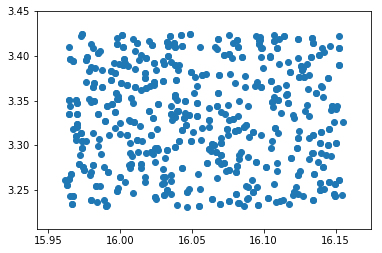

In [112]:
plt.figure()
plt.scatter(ra, dec)

In [113]:
is_primary = data['detect_isPrimary'] #& (data['parent'] > 0)
flux = data['base_PsfFlux_flux'][is_primary]
zeropoint = data['zeropoint'][is_primary]

In [114]:
#good_flux_map = np.isfinite(flux)

In [115]:
#good_flux = flux[good_flux_map]
#good_zeropoint = zeropoint[good_flux_map]

In [116]:
#mags = -2.5 * np.log10(good_flux) + good_zeropoint
mags = -2.5 * np.log10(flux) + zeropoint

(array([25., 18., 20., 16., 14., 17., 19., 18., 24., 20., 13., 21., 26.,
        25., 15., 16., 27., 17., 16., 12.]),
 array([18.05242402, 18.48117717, 18.90993033, 19.33868349, 19.76743664,
        20.1961898 , 20.62494296, 21.05369611, 21.48244927, 21.91120243,
        22.33995558, 22.76870874, 23.19746189, 23.62621505, 24.05496821,
        24.48372136, 24.91247452, 25.34122768, 25.76998083, 26.19873399,
        26.62748715]),
 <a list of 20 Patch objects>)

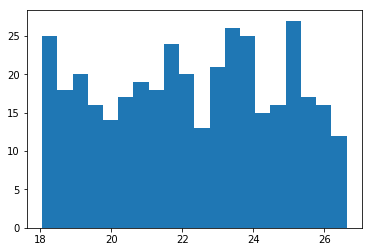

In [117]:
plt.figure()
plt.hist(mags, bins=20)

In [118]:
fake_mags = data['mag_g'][is_primary]

(array([27., 18., 24., 18., 16., 21., 19., 26., 21., 17., 26., 26., 24.,
        16., 24., 20., 18., 10.,  6.,  2.]),
 array([18.00255455, 18.47959711, 18.95663966, 19.43368222, 19.91072477,
        20.38776733, 20.86480988, 21.34185243, 21.81889499, 22.29593754,
        22.7729801 , 23.25002265, 23.72706521, 24.20410776, 24.68115032,
        25.15819287, 25.63523543, 26.11227798, 26.58932053, 27.06636309,
        27.54340564]),
 <a list of 20 Patch objects>)

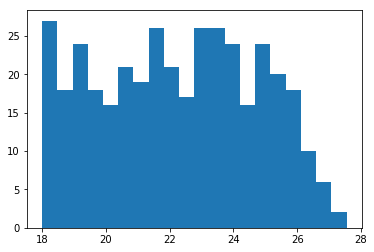

In [119]:
plt.figure()
plt.hist(fake_mags, bins=20)

In [120]:
diff_mags = mags - fake_mags

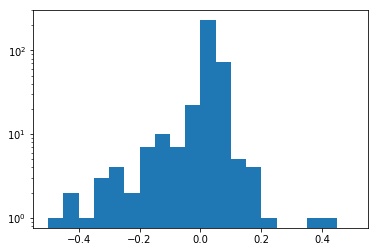

In [121]:
plt.figure()
plt.hist(diff_mags, bins=20, range=(-0.5, 0.5))
plt.yscale('log')

(-0.5, 0.5)

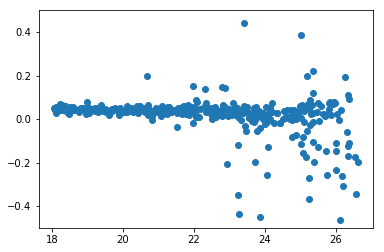

In [122]:
plt.figure()
plt.scatter(mags, diff_mags)
plt.ylim(-0.5, 0.5)

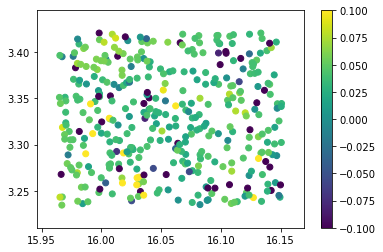

In [123]:
plt.figure()
plt.scatter(ra[is_primary], dec[is_primary], c=diff_mags, vmin=-0.1, vmax=0.1)
plt.colorbar()

In [124]:
bins = np.arange(18., 28., 0.3)
mags_hist = np.histogram(mags, bins)
fake_mags_hist = np.histogram(data['mag'], bins)
fake_mags_clean_hist = np.histogram(fake_mags, bins)
bin_centers = (mags_hist[1][:-1] + mags_hist[1][1:]) / 2.

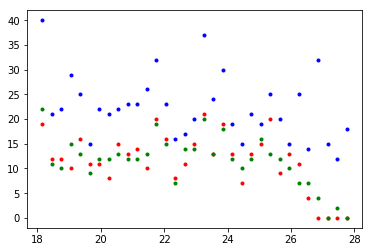

In [125]:
plt.figure()
plt.plot(bin_centers, mags_hist[0], 'r.' )
plt.plot(bin_centers, fake_mags_hist[0], 'b.')
plt.plot(bin_centers, fake_mags_clean_hist[0], 'g.')

In [126]:
completeness = mags_hist[0] / fake_mags_hist[0]
completeness2 = fake_mags_clean_hist[0] / fake_mags_hist[0]

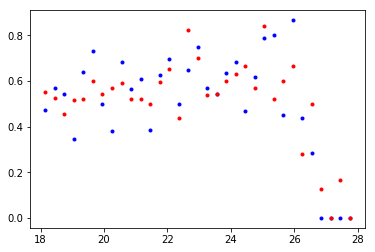

In [127]:
plt.figure()
plt.plot(bin_centers, completeness, 'b.')
plt.plot(bin_centers, completeness2, 'r.')

In [128]:
base_psf_xx = data['base_SdssShape_xx'][is_primary]
base_psf_yy = data['base_SdssShape_yy'][is_primary]
base_psf_shape = np.sqrt((base_psf_xx + base_psf_yy) / 2.)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   3.,
          3.,  18.,  44.,  33.,  36.,  22., 101.,  62.,  11.,  14.,   8.,
          3.,   2.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <a list of 50 Patch objects>)

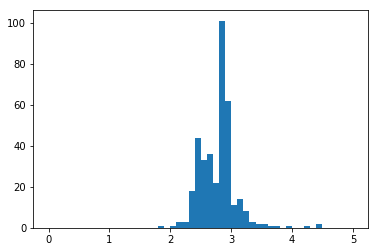

In [129]:
plt.figure()
plt.hist(base_psf_shape, bins=50, range=(0, 5))

In [130]:
pos_flux25 = data['base_CircularApertureFlux_25_0_flux'][is_primary] > 0.0

In [131]:
circular25_flux = data['base_CircularApertureFlux_25_0_flux'][is_primary][pos_flux25]

In [132]:
mags25 = -2.5 * np.log10(circular25_flux) + zeropoint[pos_flux25]

(array([24., 18., 20., 16., 13., 19., 18., 19., 26., 15., 19., 24., 30.,
        23., 21., 25., 29.,  8.,  5.,  3.]),
 array([17.99825034, 18.4130988 , 18.82794727, 19.24279573, 19.6576442 ,
        20.07249266, 20.48734113, 20.90218959, 21.31703805, 21.73188652,
        22.14673498, 22.56158345, 22.97643191, 23.39128038, 23.80612884,
        24.22097731, 24.63582577, 25.05067424, 25.4655227 , 25.88037117,
        26.29521963]),
 <a list of 20 Patch objects>)

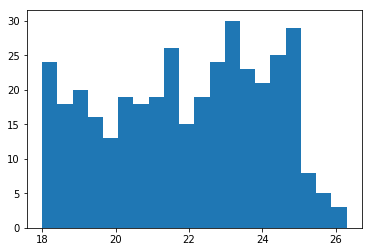

In [133]:
plt.figure()
plt.hist(mags25, bins=20)

In [134]:
diff_mags25 = mags25 - fake_mags[pos_flux25]

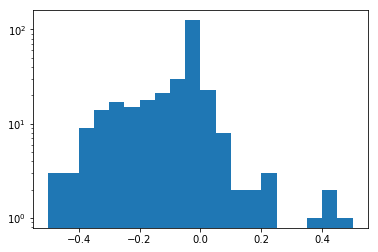

In [135]:
plt.figure()
plt.hist(diff_mags25, bins=20, range=(-0.5, 0.5))
plt.yscale('log')

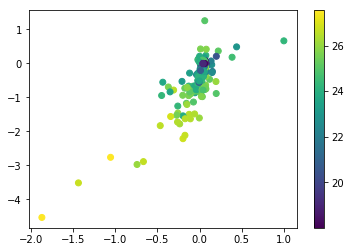

In [136]:
plt.figure()
plt.scatter(diff_mags[pos_flux25], diff_mags25, c=fake_mags[pos_flux25])
plt.colorbar()

In [137]:
hdu_all = fits.open('/scratch/jcarlin/ic_fake_catalogs/src_0_radec_G.fits')
data_all = hdu_all[1].data

In [138]:
data_all.columns

ColDefs(
    name = 'RA'; format = 'D'
    name = 'Dec'; format = 'D'
    name = 'mag_g'; format = 'D'
    name = 'mag_i'; format = 'D'
    name = 'ID'; format = 'K'
    name = 'mag'; format = 'D'
)

In [139]:
minra, maxra = np.min(ra[is_primary]), np.max(ra[is_primary])
mindec, maxdec = np.min(dec[is_primary]), np.max(dec[is_primary])

In [140]:
print(minra,maxra,mindec,maxdec)

15.964826697764392 16.150808070634334 3.234772891304431 3.420269161582702


In [141]:
ra_all = data_all['RA']
dec_all = data_all['Dec']

In [142]:
inbbox = (ra_all > minra) & (ra_all< maxra) &\
         (dec_all > mindec) & (dec_all < maxdec)

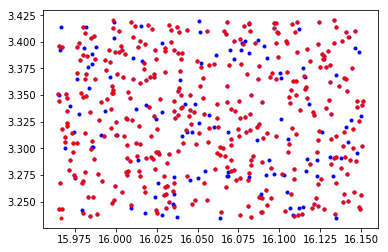

In [143]:
#plt.plot(ra_all,dec_all,'b.')
plt.plot(ra_all[inbbox],dec_all[inbbox],'b.')
plt.plot(ra[is_primary],dec[is_primary],'r.')

In [144]:
fake_mags_all_hist = np.histogram(data_all['mag_g'][inbbox], bins)

In [145]:
completeness_all = mags_hist[0] / fake_mags_all_hist[0]
completeness_all2 = fake_mags_clean_hist[0] / fake_mags_all_hist[0]

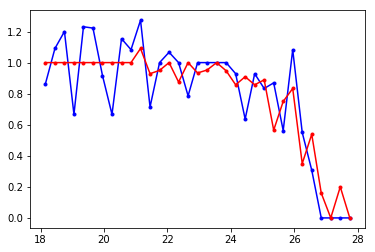

In [152]:
plt.figure()
plt.plot(bin_centers, completeness_all, 'b.-')
plt.plot(bin_centers, completeness_all2, 'r.-')
#plt.plot(bin_centers, completeness2, 'g.-')


In [147]:
np.size(data_all['mag_g'][inbbox])

490

In [148]:
np.size(np.where(data['detect_isPrimary'] == True))

379

In [149]:
np.size(np.where(data['parent'] > 0))

347

In [150]:
flagtmp = (data['deblend_nChild'] == 0) & (data['detect_isPatchInner']) &\
          (data['detect_isTractInner']) & (data['parent'] > 0)

In [151]:
np.size(np.where(flagtmp))

320